# Human Stress Detection

![](https://www.stress.org/wp-content/uploads/2020/02/anxiety-190723-1000x563-1.jpg)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
df = pd.read_csv('../input/human-stress-detection-in-and-through-sleep/SaYoPillow.csv')

In [4]:
df.head(2)

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.60,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.88,89.552,98.88,1.552,72.76,3


In [5]:
df.columns=[['snoring range','respiration rate','body temperature','limb movement rate', 
            'blood oxygen levels','eye movement', 
            'number of hours of sleep', 'heart rate','Stress Levels']]

In [6]:
df.head()

,snoring range,respiration rate,body temperature,limb movement rate,blood oxygen levels,eye movement,number of hours of sleep,heart rate,Stress Levels
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [7]:
corr = df.corr()

In [8]:
corr['Stress Levels']

,Stress Levels
snoring range,0.975322
respiration rate,0.963516
body temperature,-0.962354
limb movement rate,0.971071
blood oxygen levels,-0.961092
eye movement,0.951988
number of hours of sleep,-0.973036
heart rate,0.963516
Stress Levels,1.000000


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x = df.iloc[:,:-1]
x

,snoring range,respiration rate,body temperature,limb movement rate,blood oxygen levels,eye movement,number of hours of sleep,heart rate
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12
...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32


In [11]:
y =df.iloc[:,-1]
y

0      3
1      3
2      1
3      3
4      0
      ..
625    2
626    0
627    4
628    1
629    2
Name: (Stress Levels,), Length: 630, dtype: int64

In [12]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.20)

# Feature Selection 1

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

In [14]:
kbest = SelectKBest(mutual_info_classif,k=4)
slectfeture = kbest.fit(xtrain,ytrain)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [15]:
xtrain.columns[slectfeture.get_support()]

MultiIndex([(     'snoring range',),
            (  'respiration rate',),
            ('limb movement rate',),
            (        'heart rate',)],
           )

In [16]:
x1 = df[['snoring range','respiration rate','blood oxygen levels','heart rate']]

In [17]:
x1.head(1)

,snoring range,respiration rate,blood oxygen levels,heart rate
0,93.8,25.68,89.84,74.2


In [18]:
x1train,x1test,y1train,y1test = train_test_split(x1,y,test_size = 0.20)

In [19]:
x1train.head(1)

,snoring range,respiration rate,blood oxygen levels,heart rate
133,92.72,25.392,89.696,73.48


In [20]:
from sklearn.ensemble import AdaBoostClassifier

In [21]:
model1 = AdaBoostClassifier()
model1.fit(x1train,y1train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


AdaBoostClassifier()

In [22]:
print('train score',model1.score(x1train,y1train))
print('test score',model1.score(x1test,y1test))

train score 0.5992063492063492
test score 0.6031746031746031


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


# Feature Selection 2

In [23]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import mutual_info_classif

In [24]:
sp = SelectPercentile(mutual_info_classif,percentile = 2)
slectfeature2 = sp.fit(xtrain,ytrain)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [25]:
xtrain.columns[slectfeature2.get_support()]

MultiIndex([('snoring range',)],
           )

# Train model

In [26]:
xtrain.head(2)

,snoring range,respiration rate,body temperature,limb movement rate,blood oxygen levels,eye movement,number of hours of sleep,heart rate
363,71.84,21.184,93.184,11.184,91.184,90.92,3.776,62.96
551,91.88,25.168,91.584,15.960,89.584,98.96,1.584,72.92


In [27]:
model2 = AdaBoostClassifier()
model2.fit(xtrain,ytrain)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


AdaBoostClassifier()

In [28]:
print('train score',model2.score(xtrain,ytrain))
print('test score',model2.score(xtest,ytest))

train score 0.8095238095238095
test score 0.753968253968254


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


# feature importance again train model

In [29]:
imp = model2.feature_importances_
imp = pd.DataFrame(imp)

In [30]:
feature = xtrain.columns
feature = pd.DataFrame(feature)

In [31]:
importfeature = pd.concat([imp,feature],axis=1)
importfeature.columns=['importace','feature']

In [32]:
importfeature

,importace,feature
0,0.52,"(snoring range,)"
1,0.00,"(respiration rate,)"
2,0.12,"(body temperature,)"
3,0.00,"(limb movement rate,)"
4,0.18,"(blood oxygen levels,)"
5,0.00,"(eye movement,)"
6,0.18,"(number of hours of sleep,)"
7,0.00,"(heart rate,)"


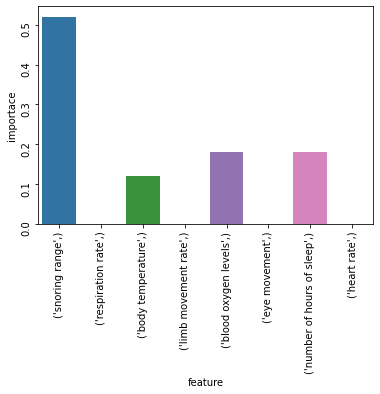

In [33]:
sns.barplot(x= importfeature['feature'],y = importfeature['importace'])
plt.tick_params(rotation =90)

In [34]:
x2 = df[['body temperature','blood oxygen levels','number of hours of sleep','respiration rate']]

In [35]:
x2.head(2)

,body temperature,blood oxygen levels,number of hours of sleep,respiration rate
0,91.840,89.840,1.840,25.680
1,91.552,89.552,1.552,25.104


In [36]:
x2train,x2test,y2train,y2test = train_test_split(x2,y,test_size = 0.20)

In [37]:
x2train.head(2)

,body temperature,blood oxygen levels,number of hours of sleep,respiration rate
381,95.024,93.536,6.024,19.024
190,94.560,92.840,5.560,18.560


In [38]:
model3 = AdaBoostClassifier()
model3.fit(x2train,y2train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


AdaBoostClassifier()

In [39]:
print('train score',model3.score(x2train,y2train))
print('test score',model3.score(x2test,y2test))

train score 0.6150793650793651
test score 0.5079365079365079


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
